In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from missforest import MissForest
from scipy.stats import ks_2samp
from sklearn.metrics import mean_absolute_error
import random
from sklearn.impute import KNNImputer


In [2]:
# Load the dataset
missF_imputed_simulated_data = pd.read_csv('missF_imputed_simulated_data.csv')
mean_imputed_simulated_data =  pd.read_csv('mean_imputed_simulated_data.csv')
knn_imputed_simulated_data =  pd.read_csv('knn_imputed_simulated_data.csv')
simulated_data =  pd.read_csv('simulated_data.csv')
imputed_data =  pd.read_csv('imputed_data.csv')

In [3]:
missing_mask = simulated_data.isna() & imputed_data.notna()


In [4]:
# Step 3: Calcolo dell'RMSE
def calculate_rmse(original, imputed, mask):
    # Appiattisci i DataFrame per confrontare i valori
    original_flat = original.values.flatten()
    imputed_flat = imputed.values.flatten()
    mask_flat = mask.values.flatten()
    # Filtra solo i valori che erano mancanti nell'originale
    original_missing = original_flat[mask_flat]
    imputed_missing = imputed_flat[mask_flat]
    
    # Calcola l'RMSE
    rmse = np.sqrt(np.mean((original_missing - imputed_missing) ** 2))
    return rmse

# Esempio di utilizzo
rmse_value_mF = calculate_rmse(imputed_data, missF_imputed_simulated_data, missing_mask)
rmse_value_mean = calculate_rmse(imputed_data, mean_imputed_simulated_data, missing_mask)
rmse_value_knn = calculate_rmse(imputed_data, knn_imputed_simulated_data, missing_mask)
print(f"RMSE missForest: {rmse_value_mF}")
print(f"RMSE mean: {rmse_value_mean}")
print(f"RMSE knn: {rmse_value_knn}")

RMSE missForest: 5.730615891553568
RMSE mean: 15.224037921494398
RMSE knn: 16.24722847355797


In [5]:
# Step 3: Calcolo dell'RMSE
def calculate_nrmse(original, imputed, mask):
    # Appiattisci i DataFrame per confrontare i valori
    original_flat = original.values.flatten()
    imputed_flat = imputed.values.flatten()
    mask_flat = mask.values.flatten()
    # Filtra solo i valori che erano mancanti nell'originale
    original_missing = original_flat[mask_flat]
    imputed_missing = imputed_flat[mask_flat]
    
    # Calcola l'RMSE
    nrmse = np.sqrt(np.mean(((original_missing - imputed_missing)/original_missing) ** 2))
    return nrmse

# Esempio di utilizzo
nrmse_value_mF = calculate_nrmse(imputed_data, missF_imputed_simulated_data, missing_mask)
nrmse_value_mean = calculate_nrmse(imputed_data, mean_imputed_simulated_data, missing_mask)
nrmse_value_knn = calculate_nrmse(imputed_data, knn_imputed_simulated_data, missing_mask)
print(f"NRMSE missForest: {nrmse_value_mF}")
print(f"NRMSE mean: {nrmse_value_mean}")
print(f"NRMSE knn: {nrmse_value_knn}")

NRMSE missForest: 0.4421003622192993
NRMSE mean: 0.8521177334116734
NRMSE knn: 0.8631488807218827


In [6]:
# Step 3: Calcolo dell'RMSE
def calculate_mae(original, imputed, mask):
    # Appiattisci i DataFrame per confrontare i valori
    original_flat = original.values.flatten()
    imputed_flat = imputed.values.flatten()
    mask_flat = mask.values.flatten()
    # Filtra solo i valori che erano mancanti nell'originale
    original_missing = original_flat[mask_flat]
    imputed_missing = imputed_flat[mask_flat]
    
    # Calcola l'RMSE
    rmse = np.sqrt(np.mean((original_missing - imputed_missing) ** 2))
    return rmse

# Esempio di utilizzo
rmse_value_mF = calculate_rmse(imputed_data, missF_imputed_simulated_data, missing_mask)
rmse_value_mean = calculate_rmse(imputed_data, mean_imputed_simulated_data, missing_mask)
rmse_value_knn = calculate_rmse(imputed_data, knn_imputed_simulated_data, missing_mask)
print(f"RMSE missForest: {rmse_value_mF}")
print(f"RMSE mean: {rmse_value_mean}")
print(f"RMSE knn: {rmse_value_knn}")

RMSE missForest: 5.730615891553568
RMSE mean: 15.224037921494398
RMSE knn: 16.24722847355797


In [25]:
def calculate_rmse_variable(simulated_data, imputed_data, imputed_simulated_data):
    """
    Calculate RMSE for each variable (column) with missing values.

    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - imputed_simulated_data (pd.DataFrame): The dataset with imputed values.
    
    Returns:
    - rmse_scores (dict): A dictionary containing RMSE for each variable with missing values.
    """
    # Get the columns with missing values
    columns_with_missing = simulated_data.columns[simulated_data.isna().any()].tolist()

    rmse_scores = {}

    # Iterate through each column with missing values
    for column in columns_with_missing:
        # Extract original and imputed values for the current column
        original_values = imputed_data.loc[simulated_data[column].isnull(), column]
        imputed_values = imputed_simulated_data.loc[simulated_data[column].isnull(), column]
        simulated_values = simulated_data.loc[simulated_data[column].isnull(), column]

        # Flatten the values for RMSE calculation
        original_flat = original_values.values.flatten()
        imputed_flat = imputed_values.values.flatten()

        # Calculate RMSE if there are any non-zero values
        if original_flat.any():
            rmse = np.sqrt(np.mean((original_flat - imputed_flat) ** 2))
            rmse_scores[column] = rmse

    return rmse_scores

# Esempio di utilizzo
rmse_scores_mF = calculate_rmse_variable(simulated_data, imputed_data, missF_imputed_simulated_data)
rmse_scores_mean = calculate_rmse_variable(simulated_data, imputed_data, mean_imputed_simulated_data)
rmse_scores_knn = calculate_rmse_variable(simulated_data, imputed_data, knn_imputed_simulated_data)
# Print the RMSE results for each column
for column, rmse in rmse_scores_mF.items():
    print(f"RMSE for missForest {column}: {rmse}")
# Print the RMSE results for each column
for column, rmse in rmse_scores_mean.items():
    print(f"RMSE for mean {column}: {rmse}")
# Print the RMSE results for each column
for column, rmse in rmse_scores_knn.items():
    print(f"RMSE for knn {column}: {rmse}")


RMSE for missForest PLT: 0.0
RMSE for missForest HB: 0.0
RMSE for missForest R_ISS: 0.3262460234249956
RMSE for missForest CREATININE: 0.0
RMSE for missForest PC_TOT: 10.906610101458854
RMSE for missForest CALCIUM: 0.18897664019023822
RMSE for mean PLT: 11.538235896191953
RMSE for mean HB: 0.3600119307925265
RMSE for mean R_ISS: 0.6000006392801125
RMSE for mean CREATININE: 0.9990454545454543
RMSE for mean PC_TOT: 28.843250606003537
RMSE for mean CALCIUM: 1.0096174660668502
RMSE for knn PLT: 22.56286587294856
RMSE for knn HB: 1.2106045016865765
RMSE for knn R_ISS: 0.6225732732443147
RMSE for knn CREATININE: 0.24703220995571673
RMSE for knn PC_TOT: 30.444979976463515
RMSE for knn CALCIUM: 1.1814724877821579


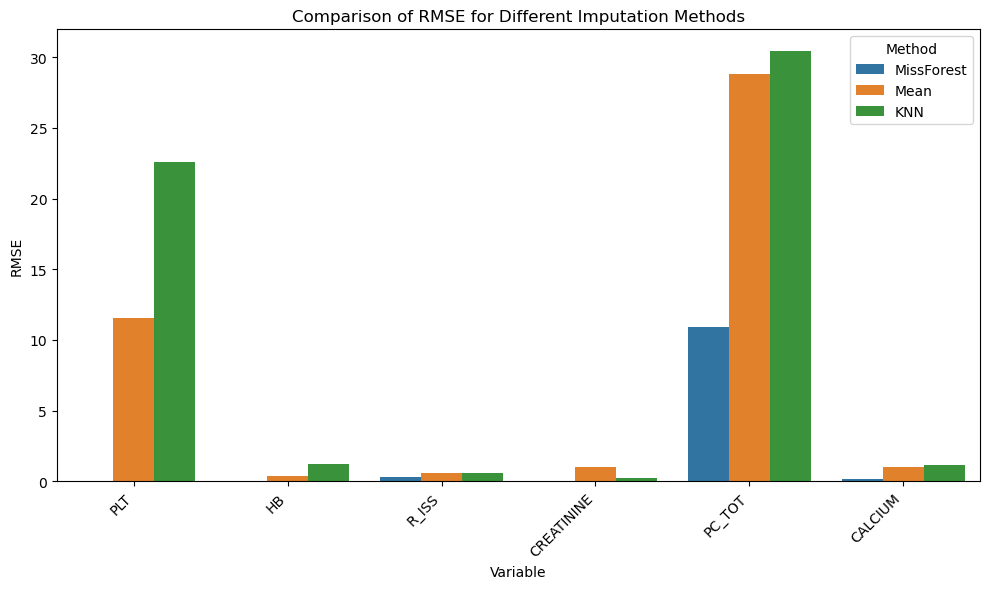

In [26]:
# Convert the dictionaries into a DataFrame
df = pd.DataFrame({
    'Variable': list(rmse_scores_mF.keys()),
    'MissForest': list(rmse_scores_mF.values()),
    'Mean': list(rmse_scores_mean.values()),
    'KNN': list(rmse_scores_knn.values())
})

# Reshape the DataFrame to have one column for RMSE values and one for the method
df_melted = df.melt(id_vars=['Variable'], value_vars=['MissForest', 'Mean', 'KNN'], 
                    var_name='Method', value_name='RMSE')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='RMSE', hue='Method', data=df_melted)

# Customize plot
plt.title('Comparison of RMSE for Different Imputation Methods')
plt.xlabel('Variable')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()

#Save plot
plt.savefig('Comparison of RMSE.png')
# Show plot
plt.show()



In [27]:
def calculate_nrmse_variable(simulated_data, imputed_data, imputed_simulated_data):
    """
    Calculate RMSE for each variable (column) with missing values.

    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - imputed_simulated_data (pd.DataFrame): The dataset with imputed values.
    
    Returns:
    - rmse_scores (dict): A dictionary containing RMSE for each variable with missing values.
    """
    # Get the columns with missing values
    columns_with_missing = simulated_data.columns[simulated_data.isna().any()].tolist()

    rmse_scores = {}

    # Iterate through each column with missing values
    for column in columns_with_missing:
        # Extract original and imputed values for the current column
        original_values = imputed_data.loc[simulated_data[column].isnull(), column]
        imputed_values = imputed_simulated_data.loc[simulated_data[column].isnull(), column]

        # Flatten the values for RMSE calculation
        original_flat = original_values.values.flatten()
        imputed_flat = imputed_values.values.flatten()

        # Calculate RMSE if there are any non-zero values
        if original_flat.any():
            rmse = np.sqrt(np.mean(((original_flat - imputed_flat)/original_flat) ** 2))
            rmse_scores[column] = rmse

    return rmse_scores

# Esempio di utilizzo
nrmse_scores_mF = calculate_nrmse_variable(simulated_data, imputed_data, missF_imputed_simulated_data)
nrmse_scores_mean = calculate_nrmse_variable(simulated_data, imputed_data, mean_imputed_simulated_data)
nrmse_scores_knn = calculate_nrmse_variable(simulated_data, imputed_data, knn_imputed_simulated_data)

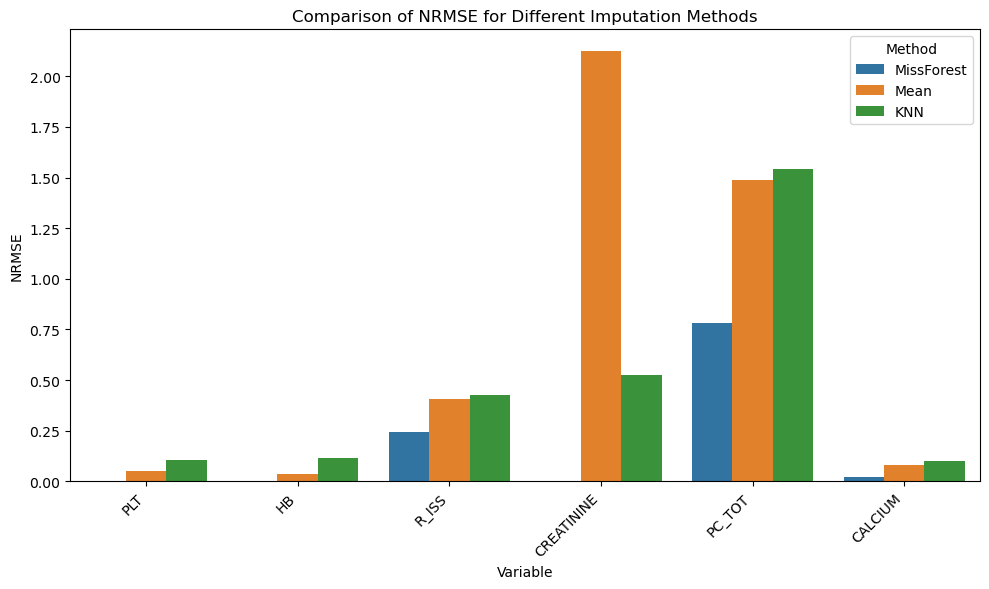

In [28]:
# Convert the dictionaries into a DataFrame
df = pd.DataFrame({
    'Variable': list(nrmse_scores_mF.keys()),
    'MissForest': list(nrmse_scores_mF.values()),
    'Mean': list(nrmse_scores_mean.values()),
    'KNN': list(nrmse_scores_knn.values())
})

# Reshape the DataFrame to have one column for RMSE values and one for the method
df_melted = df.melt(id_vars=['Variable'], value_vars=['MissForest', 'Mean', 'KNN'], 
                    var_name='Method', value_name='NRMSE')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='NRMSE', hue='Method', data=df_melted)

# Customize plot
plt.title('Comparison of NRMSE for Different Imputation Methods')
plt.xlabel('Variable')
plt.ylabel('NRMSE')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()

#Save plot
plt.savefig('Comparison of NRMSE.png')
# Show plot
plt.show()

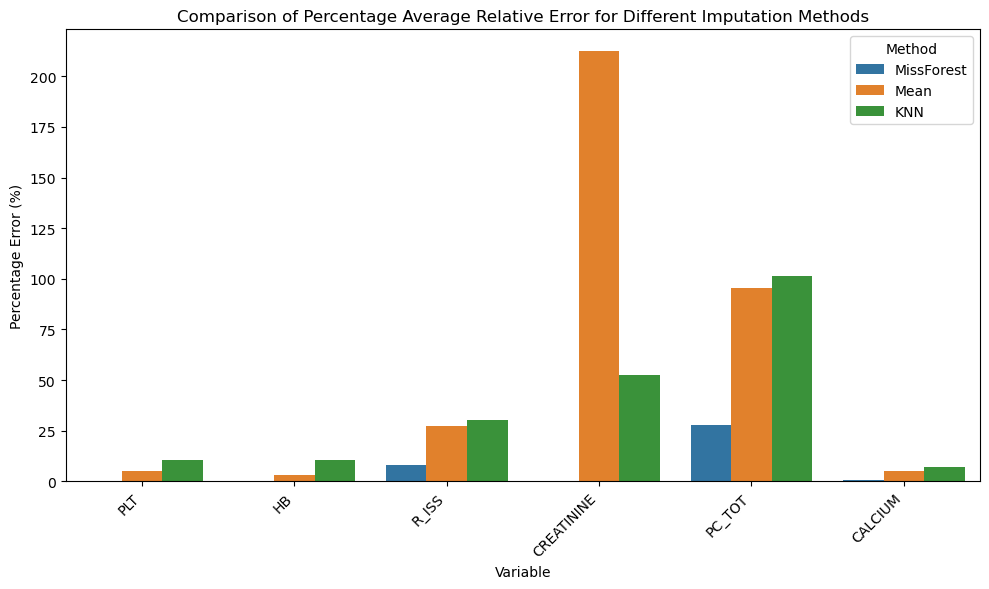

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_percentage_relative_error(simulated_data, imputed_data, missF_imputed_simulated_data, mean_imputed_simulated_data, knn_imputed_simulated_data):
    """
    Calculate the Percentage Average Relative Error for each variable (column) with missing values 
    and compare different imputation methods.
    
    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - imputed_data (pd.DataFrame): The dataset with actual imputed values.
    - imputed_simulated_data (pd.DataFrame): The dataset with imputed values for the simulation.
    
    Returns:
    - percentage_errors_df (pd.DataFrame): A DataFrame containing percentage average relative error 
                                            for each variable with missing values and each imputation method.
    """
    # Get the columns with missing values
    columns_with_missing = simulated_data.columns[simulated_data.isna().any()].tolist()

    # Dictionaries to store percentage errors for each method
    percentage_errors_mF = {}
    percentage_errors_mean = {}
    percentage_errors_knn = {}

    # Iterate through each column with missing values
    for column in columns_with_missing:
        # Extract original and imputed values for the current column
        original_values = imputed_data.loc[simulated_data[column].isnull(), column]
        imputed_values_mF = missF_imputed_simulated_data.loc[simulated_data[column].isnull(), column]
        imputed_values_mean = mean_imputed_simulated_data.loc[simulated_data[column].isnull(), column]
        imputed_values_knn = knn_imputed_simulated_data.loc[simulated_data[column].isnull(), column]

        # Flatten the values for error calculation
        original_flat = original_values.values.flatten()
        imputed_flat_mF = imputed_values_mF.values.flatten()
        imputed_flat_mean = imputed_values_mean.values.flatten()
        imputed_flat_knn = imputed_values_knn.values.flatten()

        # Calculate percentage relative error for each imputation method
        if original_flat.any():
            relative_error_mF = np.abs((original_flat - imputed_flat_mF) / original_flat)
            relative_error_mean = np.abs((original_flat - imputed_flat_mean) / original_flat)
            relative_error_knn = np.abs((original_flat - imputed_flat_knn) / original_flat)

            # Calculate the mean percentage error
            percentage_error_mF = np.mean(relative_error_mF) * 100
            percentage_error_mean = np.mean(relative_error_mean) * 100
            percentage_error_knn = np.mean(relative_error_knn) * 100

            # Store the percentage errors
            percentage_errors_mF[column] = percentage_error_mF
            percentage_errors_mean[column] = percentage_error_mean
            percentage_errors_knn[column] = percentage_error_knn

    # Convert the dictionaries into a DataFrame for plotting
    percentage_errors_df = pd.DataFrame({
        'Variable': list(percentage_errors_mF.keys()),
        'MissForest': list(percentage_errors_mF.values()),
        'Mean': list(percentage_errors_mean.values()),
        'KNN': list(percentage_errors_knn.values())
    })

    # Melt the DataFrame for easy plotting
    percentage_errors_df_melted = percentage_errors_df.melt(id_vars=['Variable'], value_vars=['MissForest', 'Mean', 'KNN'], 
                                                           var_name='Method', value_name='Percentage Error')

    # Plot the results using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Variable', y='Percentage Error', hue='Method', data=percentage_errors_df_melted)

    # Customize plot
    plt.title('Comparison of Percentage Average Relative Error for Different Imputation Methods')
    plt.xlabel('Variable')
    plt.ylabel('Percentage Error (%)')
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
    plt.tight_layout()
    
    #Save plot
    plt.savefig('Comparison of MAPE.png')
    # Show the plot
    plt.show()

    return percentage_errors_df

# Example of using the function
# Assuming you have the following dataframes:
# simulated_data: The data with simulated missing values
# imputed_data: The data with actual imputed values
# imputed_simulated_data: A DataFrame containing imputed data for each method (MissForest, Mean, KNN)

# Calculate Percentage Relative Error and generate the plot
percentage_errors_df = calculate_percentage_relative_error(simulated_data, imputed_data, missF_imputed_simulated_data,mean_imputed_simulated_data, knn_imputed_simulated_data)


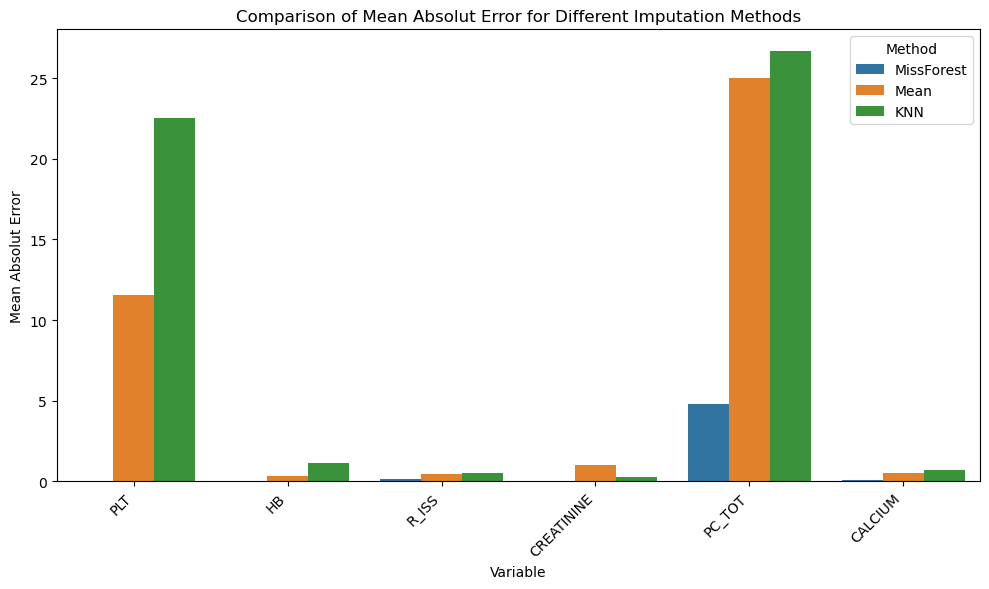

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_mean_relative_error(simulated_data, imputed_data, missF_imputed_simulated_data, mean_imputed_simulated_data, knn_imputed_simulated_data):
    """
    Calculate the Percentage Average Relative Error for each variable (column) with missing values 
    and compare different imputation methods.
    
    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - imputed_data (pd.DataFrame): The dataset with actual imputed values.
    - imputed_simulated_data (pd.DataFrame): The dataset with imputed values for the simulation.
    
    Returns:
    - percentage_errors_df (pd.DataFrame): A DataFrame containing percentage average relative error 
                                            for each variable with missing values and each imputation method.
    """
    # Get the columns with missing values
    columns_with_missing = simulated_data.columns[simulated_data.isna().any()].tolist()

    # Dictionaries to store percentage errors for each method
    mean_errors_mF = {}
    mean_errors_mean = {}
    mean_errors_knn = {}


    # Iterate through each column with missing values
    for column in columns_with_missing:
        # Extract original and imputed values for the current column
        original_values = imputed_data.loc[simulated_data[column].isnull(), column]
        imputed_values_mF = missF_imputed_simulated_data.loc[simulated_data[column].isnull(), column]
        imputed_values_mean = mean_imputed_simulated_data.loc[simulated_data[column].isnull(), column]
        imputed_values_knn = knn_imputed_simulated_data.loc[simulated_data[column].isnull(), column]

        # Flatten the values for error calculation
        original_flat = original_values.values.flatten()
        imputed_flat_mF = imputed_values_mF.values.flatten()
        imputed_flat_mean = imputed_values_mean.values.flatten()
        imputed_flat_knn = imputed_values_knn.values.flatten()

        # Calculate percentage relative error for each imputation method
        if original_flat.any():
            relative_error_mF = np.abs((original_flat - imputed_flat_mF))
            relative_error_mean = np.abs((original_flat - imputed_flat_mean))
            relative_error_knn = np.abs((original_flat - imputed_flat_knn))

            # Calculate the mean percentage error
            mean_error_mF = np.mean(relative_error_mF) 
            mean_error_mean = np.mean(relative_error_mean) 
            mean_error_knn = np.mean(relative_error_knn) 

            # Store the percentage errors
            mean_errors_mF[column] = mean_error_mF
            mean_errors_mean[column] = mean_error_mean
            mean_errors_knn[column] = mean_error_knn

    # Convert the dictionaries into a DataFrame for plotting
    mean_errors_df = pd.DataFrame({
        'Variable': list(mean_errors_mF.keys()),
        'MissForest': list(mean_errors_mF.values()),
        'Mean': list(mean_errors_mean.values()),
        'KNN': list(mean_errors_knn.values())
    })

    # Melt the DataFrame for easy plotting
    mean_errors_df_melted = mean_errors_df.melt(id_vars=['Variable'], value_vars=['MissForest', 'Mean', 'KNN'], 
                                                           var_name='Method', value_name='Percentage Error')

    # Plot the results using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Variable', y='Percentage Error', hue='Method', data=mean_errors_df_melted)

    # Customize plot
    plt.title('Comparison of Mean Absolut Error for Different Imputation Methods')
    plt.xlabel('Variable')
    plt.ylabel('Mean Absolut Error')
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
    plt.tight_layout()

    #Save plot
    plt.savefig('Comparison of MAE.png')
    # Show the plot
    plt.show()

    return mean_errors_df

# Example of using the function
# Assuming you have the following dataframes:
# simulated_data: The data with simulated missing values
# imputed_data: The data with actual imputed values
# imputed_simulated_data: A DataFrame containing imputed data for each method (MissForest, Mean, KNN)

# Calculate Percentage Relative Error and generate the plot
mean_errors_df = calculate_mean_relative_error(simulated_data, imputed_data, missF_imputed_simulated_data,mean_imputed_simulated_data, knn_imputed_simulated_data)


In [31]:
import numpy as np
import pandas as pd

def calculate_percentage_relative_error_all(simulated_data, imputed_data, missF_imputed_simulated_data, mean_imputed_simulated_data, knn_imputed_simulated_data):
    """
    Calculate the Percentage Average Relative Error for all variables (columns) with missing values 
    across three imputation methods (MissForest, Mean, KNN).
    
    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - imputed_data (pd.DataFrame): The dataset with actual imputed values.
    - missF_imputed_simulated_data (pd.DataFrame): The dataset containing imputed values by MissForest.
    - mean_imputed_simulated_data (pd.DataFrame): The dataset containing imputed values by Mean method.
    - knn_imputed_simulated_data (pd.DataFrame): The dataset containing imputed values by KNN method.
    
    Returns:
    - percentage_error_dict (dict): A dictionary with the overall percentage error for each imputation method.
    """
    # Initialize a dictionary to store the overall percentage errors for each method
    percentage_error_dict = {
        'MissForest': [],
        'Mean': [],
        'KNN': []
    }
    
    # Iterate through each variable that has missing values
    for variable in simulated_data.columns:
        if simulated_data[variable].isnull().any():
            # Extract original and imputed values for the current variable for each method
            original_values = imputed_data.loc[simulated_data[variable].isnull(), variable].values.flatten()
            
            # MissForest Imputed Values
            imputed_values_missF = missF_imputed_simulated_data.loc[simulated_data[variable].isnull(), variable].values.flatten()
            # Mean Imputed Values
            imputed_values_mean = mean_imputed_simulated_data.loc[simulated_data[variable].isnull(), variable].values.flatten()
            # KNN Imputed Values
            imputed_values_knn = knn_imputed_simulated_data.loc[simulated_data[variable].isnull(), variable].values.flatten()
            
            # Calculate relative errors for each method
            relative_errors_missF = np.abs((original_values - imputed_values_missF) / original_values)
            relative_errors_mean = np.abs((original_values - imputed_values_mean) / original_values)
            relative_errors_knn = np.abs((original_values - imputed_values_knn) / original_values)
            
            # Append the percentage errors for each method
            percentage_error_dict['MissForest'].extend(relative_errors_missF)
            percentage_error_dict['Mean'].extend(relative_errors_mean)
            percentage_error_dict['KNN'].extend(relative_errors_knn)

    # Calculate the overall percentage average relative error for each method
    percentage_error_overall = {}
    for method in percentage_error_dict:
        # Calculate mean error as a percentage
        percentage_error_overall[method] = np.mean(percentage_error_dict[method]) * 100

    # Print the overall percentage average relative error for each method
    for method, error in percentage_error_overall.items():
        print(f"Overall Percentage Average Relative Error for {method}: {error:.2f}%")
    
    return percentage_error_overall

# Example of using the function
# Assuming you have the following dataframes:
# simulated_data: The data with simulated missing values
# imputed_data: The data with actual imputed values
# missF_imputed_simulated_data: The dataset containing imputed data by MissForest
# mean_imputed_simulated_data: The dataset containing imputed data by Mean method
# knn_imputed_simulated_data: The dataset containing imputed data by KNN method

# Calculate the overall Percentage Average Relative Error for all variables by each method
percentage_error_all = calculate_percentage_relative_error_all(
    simulated_data, 
    imputed_data, 
    missF_imputed_simulated_data, 
    mean_imputed_simulated_data, 
    knn_imputed_simulated_data
)


Overall Percentage Average Relative Error for MissForest: 11.67%
Overall Percentage Average Relative Error for Mean: 41.82%
Overall Percentage Average Relative Error for KNN: 44.16%


KS Test for PLT using MissForest: KS Statistic = 0.003884377776400339, p-value = 1.0
KS Test for PLT using Mean: KS Statistic = 0.005082749643587677, p-value = 1.0
KS Test for PLT using KNN: KS Statistic = 0.0035124692658939235, p-value = 1.0


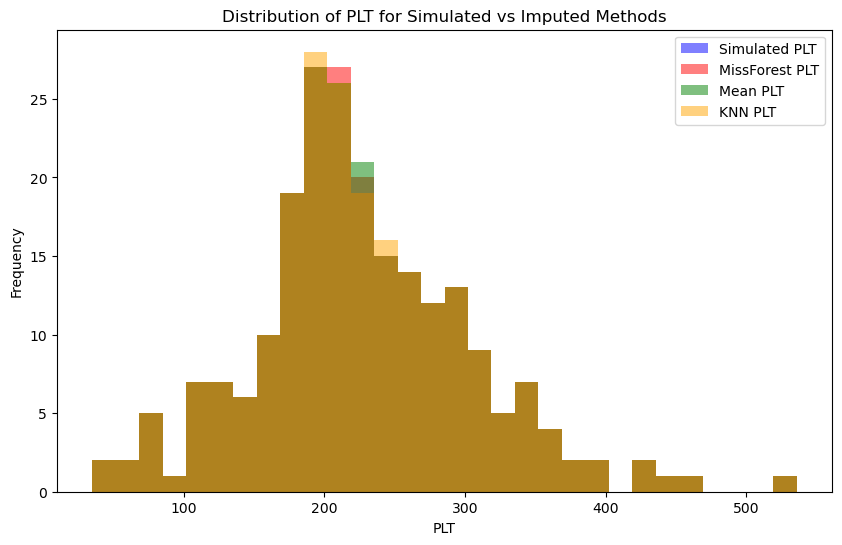

The result for PLT using MissForest is not significant after Bonferroni correction.
The result for PLT using Mean is not significant after Bonferroni correction.
The result for PLT using KNN is not significant after Bonferroni correction.
KS Test for HB using MissForest: KS Statistic = 0.004462902126076985, p-value = 1.0
KS Test for HB using Mean: KS Statistic = 0.004752164300915308, p-value = 1.0
KS Test for HB using KNN: KS Statistic = 0.005454658154094093, p-value = 1.0


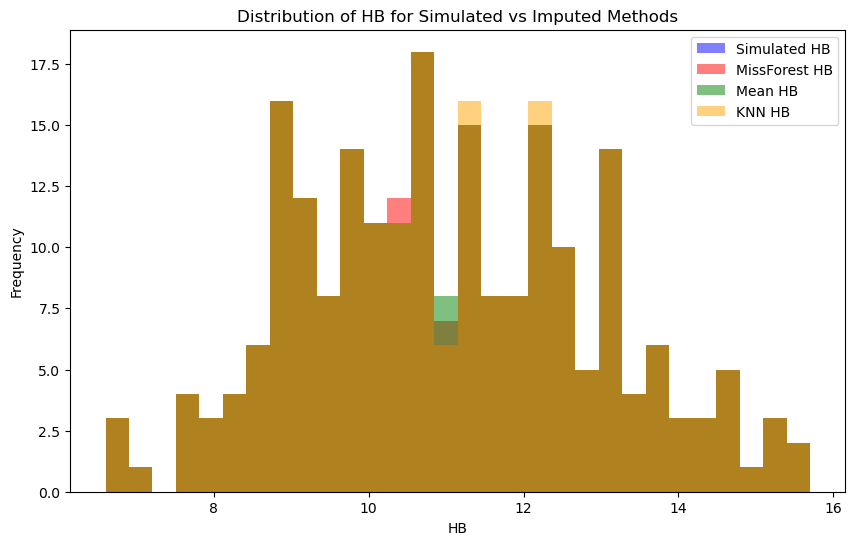

The result for HB using MissForest is not significant after Bonferroni correction.
The result for HB using Mean is not significant after Bonferroni correction.
The result for HB using KNN is not significant after Bonferroni correction.
KS Test for R_ISS using MissForest: KS Statistic = 0.0702195408077761, p-value = 0.7106941393414996
KS Test for R_ISS using Mean: KS Statistic = 0.199402268029719, p-value = 0.0009583230491827612
KS Test for R_ISS using KNN: KS Statistic = 0.06569465392994804, p-value = 0.7818681191359104


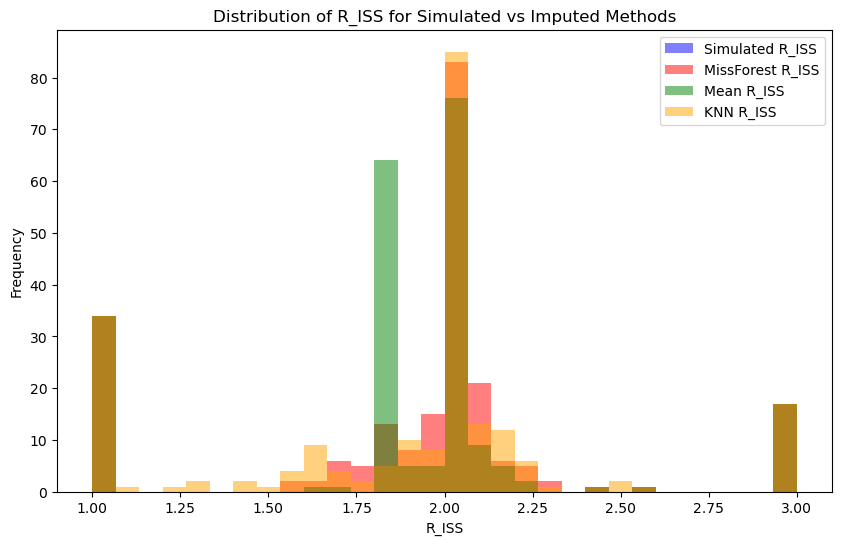

The result for R_ISS using MissForest is not significant after Bonferroni correction.
The result for R_ISS using Mean is significant after Bonferroni correction.
The result for R_ISS using KNN is not significant after Bonferroni correction.
KS Test for CREATININE using MissForest: KS Statistic = 0.002797202797202797, p-value = 1.0
KS Test for CREATININE using Mean: KS Statistic = 0.0037638831756478816, p-value = 1.0
KS Test for CREATININE using KNN: KS Statistic = 0.0035787741670094612, p-value = 1.0


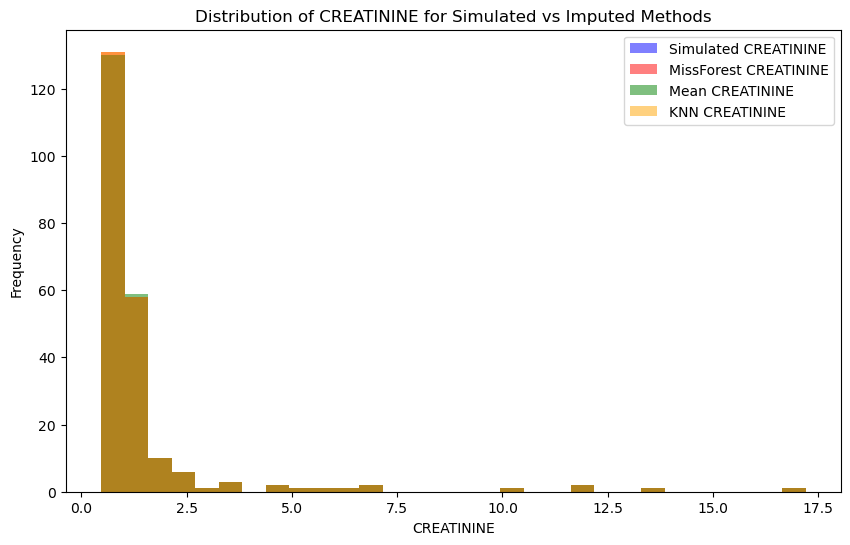

The result for CREATININE using MissForest is not significant after Bonferroni correction.
The result for CREATININE using Mean is not significant after Bonferroni correction.
The result for CREATININE using KNN is not significant after Bonferroni correction.
KS Test for PC_TOT using MissForest: KS Statistic = 0.046294944776918215, p-value = 0.9722554695115813
KS Test for PC_TOT using Mean: KS Statistic = 0.09451175010947307, p-value = 0.3024571523971861
KS Test for PC_TOT using KNN: KS Statistic = 0.06050211647934608, p-value = 0.8237078034558893


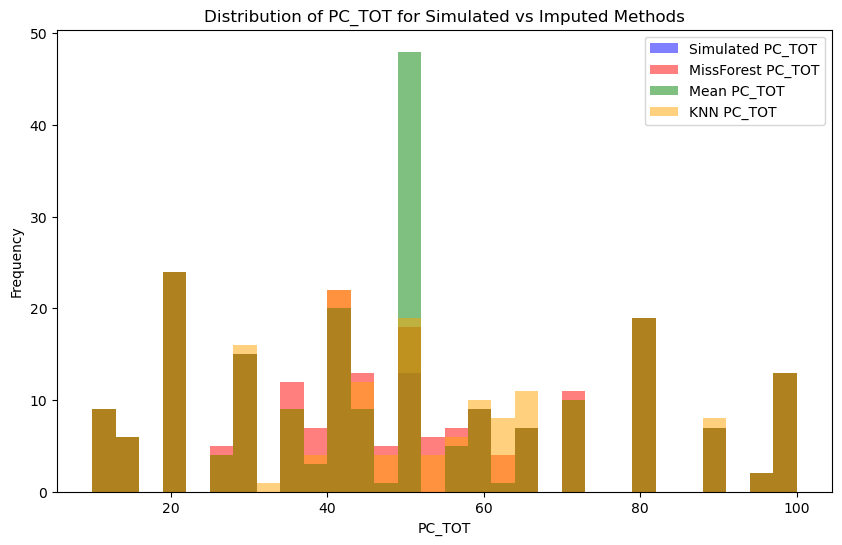

The result for PC_TOT using MissForest is not significant after Bonferroni correction.
The result for PC_TOT using Mean is not significant after Bonferroni correction.
The result for PC_TOT using KNN is not significant after Bonferroni correction.
KS Test for CALCIUM using MissForest: KS Statistic = 0.034933064497221764, p-value = 0.9989618202339545
KS Test for CALCIUM using Mean: KS Statistic = 0.0807446135090146, p-value = 0.47956360079181587
KS Test for CALCIUM using KNN: KS Statistic = 0.0331043537383068, p-value = 0.9995791376730558


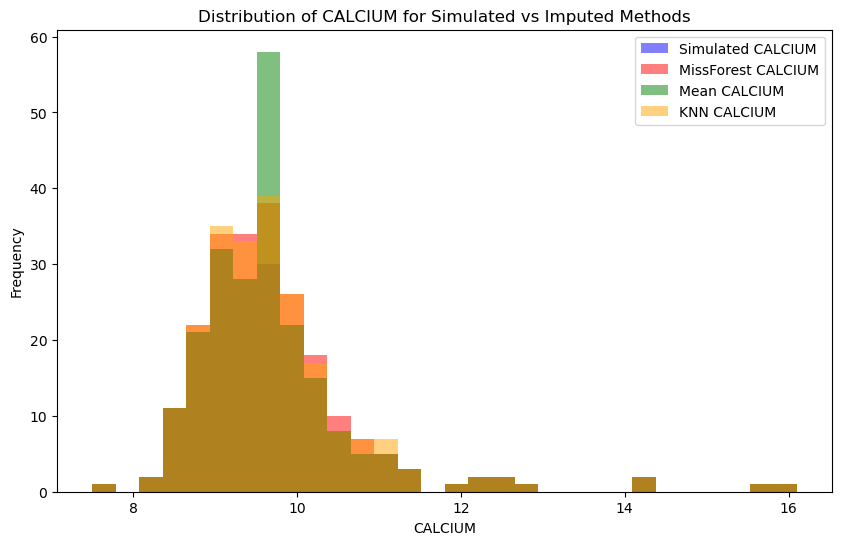

The result for CALCIUM using MissForest is not significant after Bonferroni correction.
The result for CALCIUM using Mean is not significant after Bonferroni correction.
The result for CALCIUM using KNN is not significant after Bonferroni correction.


In [21]:
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def ks_test_comparison(simulated_data, missF_imputed_data, mean_imputed_data, knn_imputed_data, variables_to_check):
    """
    Perform Kolmogorov-Smirnov (KS) tests comparing simulated and imputed data (using three methods: MissForest, Mean, KNN).
    Also perform Bonferroni correction and plot the distributions for each method on the same graph.

    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - missF_imputed_data (pd.DataFrame): The dataset with MissForest imputed values.
    - mean_imputed_data (pd.DataFrame): The dataset with Mean imputed values.
    - knn_imputed_data (pd.DataFrame): The dataset with KNN imputed values.
    - variables_to_check (list): The list of variables (columns) to perform the KS test on.
    """
    
    alpha_originale = 0.05
    alpha_nuovo = alpha_originale / len(variables_to_check)
    
    # Store results for significance checking
    ks_results = {}
    
    # Perform KS tests for each variable and each imputation method
    for variable in variables_to_check:
        # Initialize a dictionary to store p-values
        p_values = {}

        # KS Test for each method (MissForest, Mean, and KNN)
        for method, imputed_data in {'MissForest': missF_imputed_data, 'Mean': mean_imputed_data, 'KNN': knn_imputed_data}.items():
            ks_stat, p_value = ks_2samp(simulated_data[variable].dropna(), imputed_data[variable].dropna())
            p_values[method] = p_value

            # Print KS test results for each method
            print(f"KS Test for {variable} using {method}: KS Statistic = {ks_stat}, p-value = {p_value}")

        # Plot distributions for Simulated Data, MissForest, Mean, and KNN on the same plot
        plt.figure(figsize=(10, 6))
        
        # Plot the simulated data
        plt.hist(simulated_data[variable].dropna(), bins=30, alpha=0.5, label=f"Simulated {variable}", color='blue')
        
        # Plot the imputed data for each method
        plt.hist(missF_imputed_data[variable].dropna(), bins=30, alpha=0.5, label=f"MissForest {variable}", color='red')
        plt.hist(mean_imputed_data[variable].dropna(), bins=30, alpha=0.5, label=f"Mean {variable}", color='green')
        plt.hist(knn_imputed_data[variable].dropna(), bins=30, alpha=0.5, label=f"KNN {variable}", color='orange')
        
        # Title and labels
        plt.title(f"Distribution of {variable} for Simulated vs Imputed Methods")
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
        plt.show()

        # Apply Bonferroni correction for multiple comparisons
        for method, p_value in p_values.items():
            if p_value < alpha_nuovo:
                ks_results[(variable, method)] = "Significant"
                print(f"The result for {variable} using {method} is significant after Bonferroni correction.")
            else:
                ks_results[(variable, method)] = "Not Significant"
                print(f"The result for {variable} using {method} is not significant after Bonferroni correction.")
    
    return ks_results

# Example of how to call the function
# Assuming you have the following dataframes:
# - simulated_data: The dataset with simulated missing values
# - missF_imputed_data: The dataset with MissForest imputed values
# - mean_imputed_data: The dataset with Mean imputed values
# - knn_imputed_data: The dataset with KNN imputed values
# - variables_to_check: A list of variables (columns) to test



variables_to_check = ['PLT', 'HB', 'R_ISS', 'CREATININE', 'PC_TOT', 'CALCIUM'] # Replace with your actual variable names

ks_results = ks_test_comparison(simulated_data, missF_imputed_simulated_data, mean_imputed_simulated_data, knn_imputed_simulated_data, variables_to_check)


KS Test for PLT using MissForest: KS Statistic = 0.003884377776400339, p-value = 1.0
KS Test for PLT using Mean: KS Statistic = 0.005082749643587677, p-value = 1.0
KS Test for PLT using KNN: KS Statistic = 0.0035124692658939235, p-value = 1.0


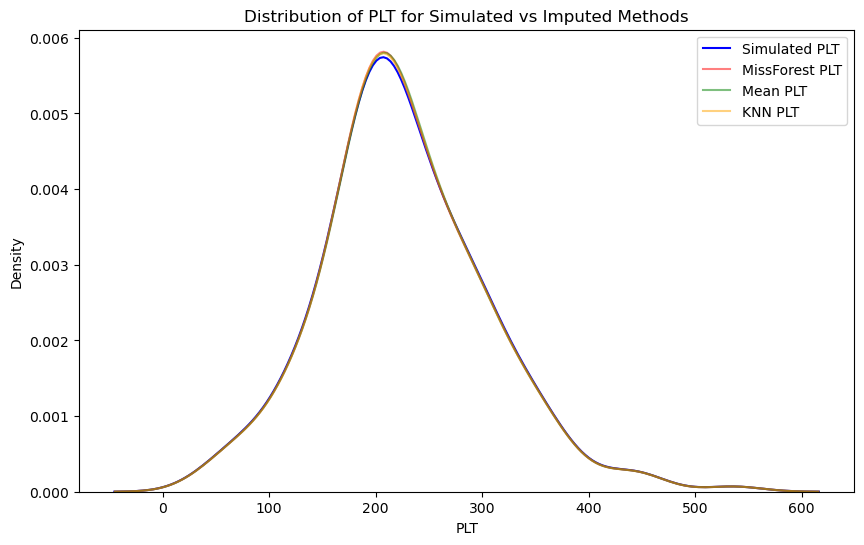

The result for PLT using MissForest is not significant after Bonferroni correction.
The result for PLT using Mean is not significant after Bonferroni correction.
The result for PLT using KNN is not significant after Bonferroni correction.
KS Test for HB using MissForest: KS Statistic = 0.004462902126076985, p-value = 1.0
KS Test for HB using Mean: KS Statistic = 0.004752164300915308, p-value = 1.0
KS Test for HB using KNN: KS Statistic = 0.005454658154094093, p-value = 1.0


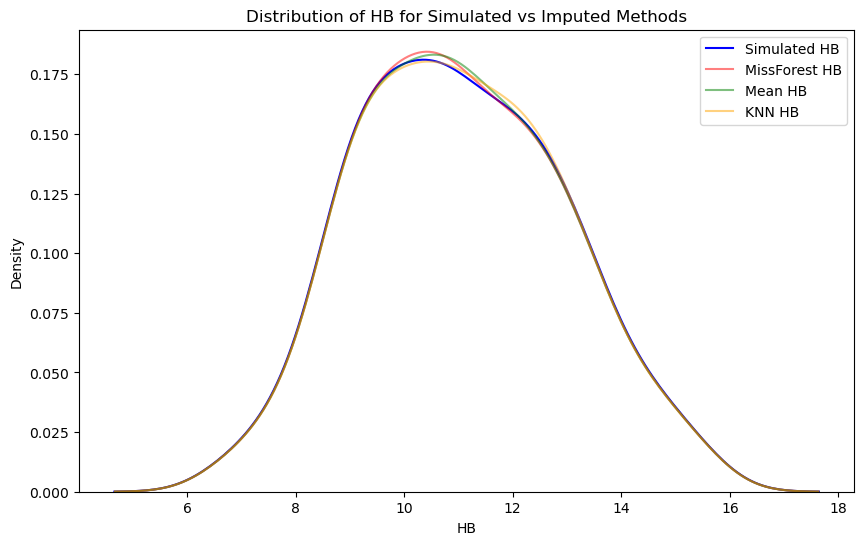

The result for HB using MissForest is not significant after Bonferroni correction.
The result for HB using Mean is not significant after Bonferroni correction.
The result for HB using KNN is not significant after Bonferroni correction.
KS Test for R_ISS using MissForest: KS Statistic = 0.0702195408077761, p-value = 0.7106941393414996
KS Test for R_ISS using Mean: KS Statistic = 0.199402268029719, p-value = 0.0009583230491827612
KS Test for R_ISS using KNN: KS Statistic = 0.06569465392994804, p-value = 0.7818681191359104


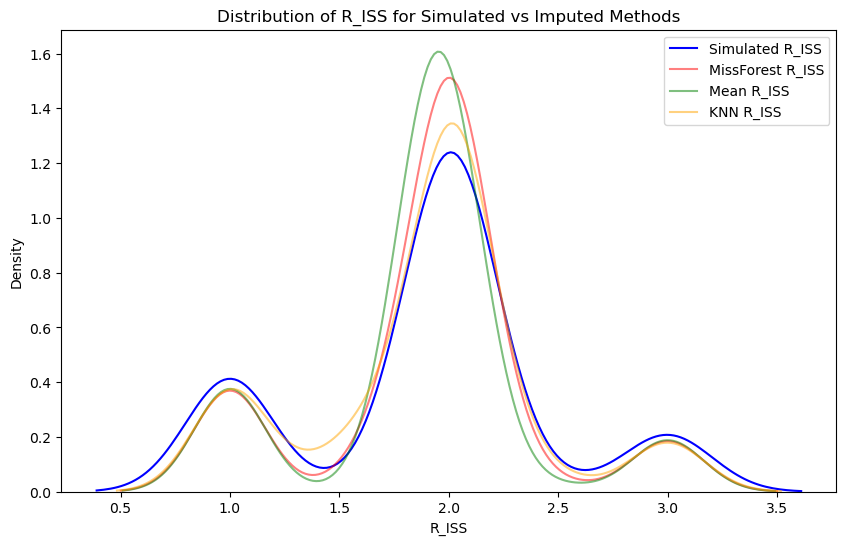

The result for R_ISS using MissForest is not significant after Bonferroni correction.
The result for R_ISS using Mean is significant after Bonferroni correction.
The result for R_ISS using KNN is not significant after Bonferroni correction.
KS Test for CREATININE using MissForest: KS Statistic = 0.002797202797202797, p-value = 1.0
KS Test for CREATININE using Mean: KS Statistic = 0.0037638831756478816, p-value = 1.0
KS Test for CREATININE using KNN: KS Statistic = 0.0035787741670094612, p-value = 1.0


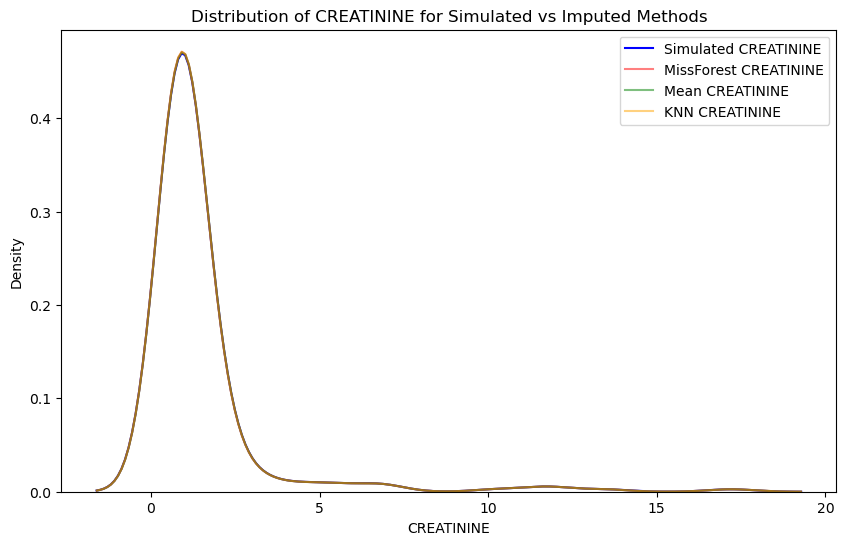

The result for CREATININE using MissForest is not significant after Bonferroni correction.
The result for CREATININE using Mean is not significant after Bonferroni correction.
The result for CREATININE using KNN is not significant after Bonferroni correction.
KS Test for PC_TOT using MissForest: KS Statistic = 0.046294944776918215, p-value = 0.9722554695115813
KS Test for PC_TOT using Mean: KS Statistic = 0.09451175010947307, p-value = 0.3024571523971861
KS Test for PC_TOT using KNN: KS Statistic = 0.06050211647934608, p-value = 0.8237078034558893


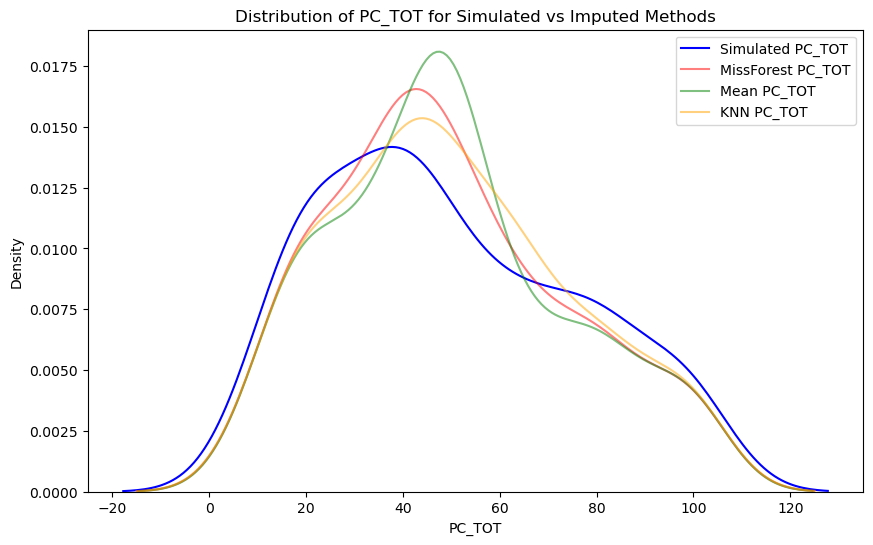

The result for PC_TOT using MissForest is not significant after Bonferroni correction.
The result for PC_TOT using Mean is not significant after Bonferroni correction.
The result for PC_TOT using KNN is not significant after Bonferroni correction.
KS Test for CALCIUM using MissForest: KS Statistic = 0.034933064497221764, p-value = 0.9989618202339545
KS Test for CALCIUM using Mean: KS Statistic = 0.0807446135090146, p-value = 0.47956360079181587
KS Test for CALCIUM using KNN: KS Statistic = 0.0331043537383068, p-value = 0.9995791376730558


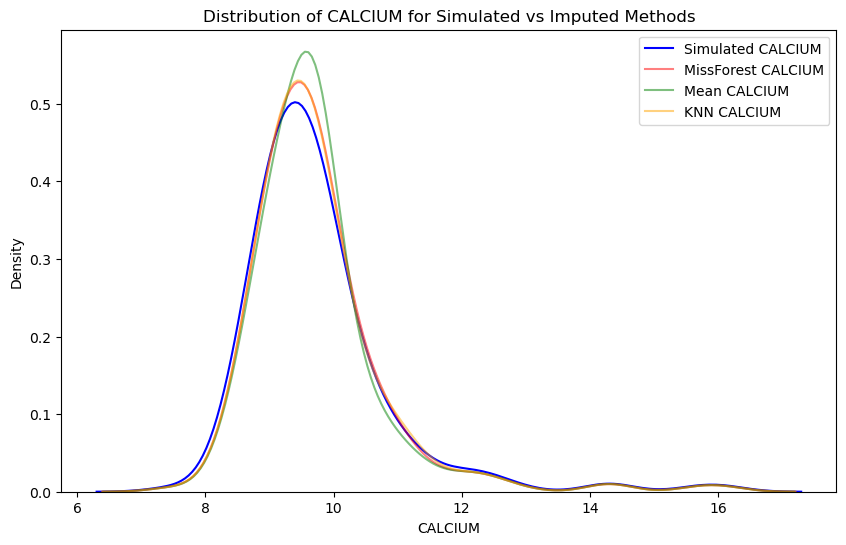

The result for CALCIUM using MissForest is not significant after Bonferroni correction.
The result for CALCIUM using Mean is not significant after Bonferroni correction.
The result for CALCIUM using KNN is not significant after Bonferroni correction.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def ks_test_comparison_kde(simulated_data, missF_imputed_data, mean_imputed_data, knn_imputed_data, variables_to_check):
    """
    Perform Kolmogorov-Smirnov (KS) tests comparing simulated and imputed data (using three methods: MissForest, Mean, KNN).
    Also perform Bonferroni correction and plot the distributions for each method using KDE.

    Parameters:
    - simulated_data (pd.DataFrame): The dataset with simulated missing values.
    - missF_imputed_data (pd.DataFrame): The dataset with MissForest imputed values.
    - mean_imputed_data (pd.DataFrame): The dataset with Mean imputed values.
    - knn_imputed_data (pd.DataFrame): The dataset with KNN imputed values.
    - variables_to_check (list): The list of variables (columns) to perform the KS test on.
    """
    
    alpha_originale = 0.05
    alpha_nuovo = alpha_originale / len(variables_to_check)
    
    # Store results for significance checking
    ks_results = {}
    
    # Perform KS tests for each variable and each imputation method
    for variable in variables_to_check:
        # Initialize a dictionary to store p-values
        p_values = {}

        # KS Test for each method (MissForest, Mean, and KNN)
        for method, imputed_data in {'MissForest': missF_imputed_data, 'Mean': mean_imputed_data, 'KNN': knn_imputed_data}.items():
            ks_stat, p_value = ks_2samp(simulated_data[variable].dropna(), imputed_data[variable].dropna())
            p_values[method] = p_value

            # Print KS test results for each method
            print(f"KS Test for {variable} using {method}: KS Statistic = {ks_stat}, p-value = {p_value}")

        # Plot distributions for Simulated Data, MissForest, Mean, and KNN using KDE
        plt.figure(figsize=(10, 6))

        # KDE plot for the simulated data
        sns.kdeplot(simulated_data[variable].dropna(), label=f"Simulated {variable}", color='blue', fill=False)
        
        # KDE plot for the imputed data for each method
        sns.kdeplot(missF_imputed_data[variable].dropna(), label=f"MissForest {variable}", color='red', fill=False, alpha=0.5)
        sns.kdeplot(mean_imputed_data[variable].dropna(), label=f"Mean {variable}", color='green', fill=False, alpha=0.5)
        sns.kdeplot(knn_imputed_data[variable].dropna(), label=f"KNN {variable}", color='orange', fill=False, alpha=0.5)

        # Title and labels
        plt.title(f"Distribution of {variable} for Simulated vs Imputed Methods")
        plt.xlabel(variable)
        plt.ylabel('Density')
        plt.legend(loc='upper right')
        plt.show()

        # Apply Bonferroni correction for multiple comparisons
        for method, p_value in p_values.items():
            if p_value < alpha_nuovo:
                ks_results[(variable, method)] = "Significant"
                print(f"The result for {variable} using {method} is significant after Bonferroni correction.")
            else:
                ks_results[(variable, method)] = "Not Significant"
                print(f"The result for {variable} using {method} is not significant after Bonferroni correction.")
    
    return ks_results

# Example of how to call the function
# Assuming you have the following dataframes:
# - simulated_data: The dataset with simulated missing values
# - missF_imputed_data: The dataset with MissForest imputed values
# - mean_imputed_data: The dataset with Mean imputed values
# - knn_imputed_data: The dataset with KNN imputed values
# - variables_to_check: A list of variables (columns) to test

variables_to_check = ['PLT', 'HB', 'R_ISS', 'CREATININE', 'PC_TOT', 'CALCIUM'] # Replace with your actual variable names

ks_results = ks_test_comparison_kde(simulated_data, missF_imputed_simulated_data, mean_imputed_simulated_data, knn_imputed_simulated_data, variables_to_check)


In [23]:
def calculate_eigenvalue_distance(correlation_matrix_before, correlation_matrix_after, method):
    """
    Calculate the Euclidean distance between the eigenvalues of two correlation matrices.

    Parameters:
    - correlation_matrix_before (np.ndarray): The initial correlation matrix.
    - correlation_matrix_after (np.ndarray): The comparison correlation matrix.

    Returns:
    - float: The Euclidean distance between the sets of eigenvalues of the two matrices.
    """
    # Step 1: Calculate the eigenvalues of both matrices
    eigenvalues1 = np.linalg.eigvalsh(correlation_matrix_before)  # Sorted eigenvalues for the first matrix
    eigenvalues2 = np.linalg.eigvalsh(correlation_matrix_after)   # Sorted eigenvalues for the second matrix

    # Step 2: Calculate the Euclidean distance between the sets of eigenvalues
    eigenvalue_distance = np.linalg.norm(eigenvalues1 - eigenvalues2)
    
    print(f"Euclidean Distance between Eigenvalues for {method}: {eigenvalue_distance}")
    
    return eigenvalue_distance

In [32]:
# Calculate the pairwise correlation matrix using available data before imputation
correlation_matrix_before = simulated_data.corr()  # Automatically ignores NaNs


#Calculate the pairwise correlation matrix after imputation
correlation_matrix_after_missF = missF_imputed_simulated_data.corr()
correlation_matrix_after_mean = mean_imputed_simulated_data.corr()
correlation_matrix_after_knn = knn_imputed_simulated_data.corr()

eigenvalue_distanze_missF=calculate_eigenvalue_distance(correlation_matrix_before, correlation_matrix_after_missF, 'missForest')
eigenvalue_distanze_mean=calculate_eigenvalue_distance(correlation_matrix_before, correlation_matrix_after_mean, 'Mean')
eigenvalue_distanze_knn=calculate_eigenvalue_distance(correlation_matrix_before, correlation_matrix_after_knn, 'KNN')

Euclidean Distance between Eigenvalues for missForest: 0.11346543588100157
Euclidean Distance between Eigenvalues for Mean: 0.1096561318367266
Euclidean Distance between Eigenvalues for KNN: 0.11837810039715739
